In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
data_path = "data/raw/Combined Data.csv"
df = pd.read_csv(data_path)

In [4]:
df.head()



,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [5]:
df.columns


Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [6]:
df.isnull().sum()


,0
Unnamed: 0,0
statement,362
status,0


In [7]:
df = df.dropna()


In [8]:
label_counts = df['status'].value_counts()
label_counts


,count
status,
Normal,16343
Depression,15404
Suicidal,10652
Anxiety,3841
Bipolar,2777
Stress,2587
Personality disorder,1077


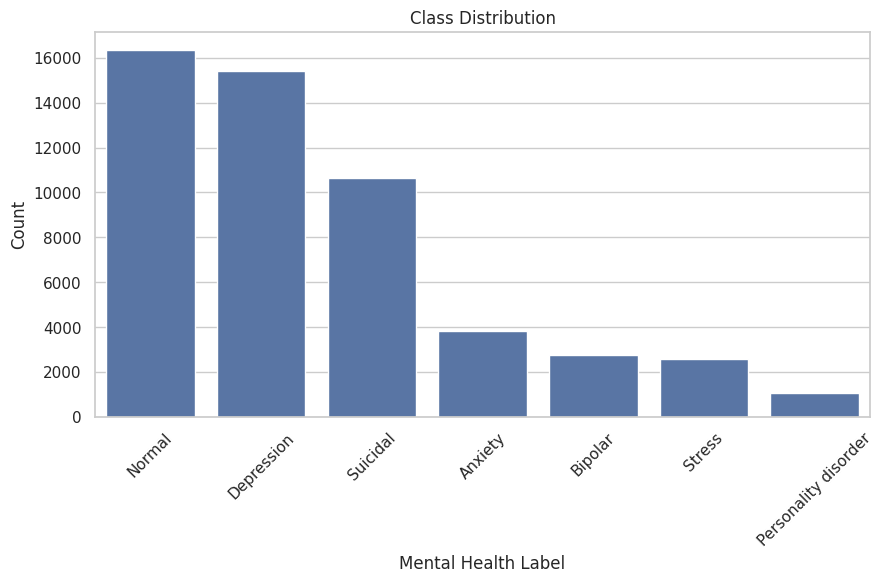

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=45)
plt.title("Class Distribution")
plt.ylabel("Count")
plt.xlabel("Mental Health Label")
plt.show()


In [10]:
target_classes = ['Stress', 'Anxiety', 'Depression', 'Normal']
df = df[df['status'].isin(target_classes)]


In [11]:
df['status'].value_counts()


,count
status,
Normal,16343
Depression,15404
Anxiety,3841
Stress,2587


In [12]:
df['text_length'] = df['statement'].apply(lambda x: len(x.split()))
df['text_length'].describe()


,text_length
count,38175.000000
mean,97.418965
std,150.403942
min,1.000000
25%,11.000000
50%,43.000000
75%,125.000000
max,4239.000000


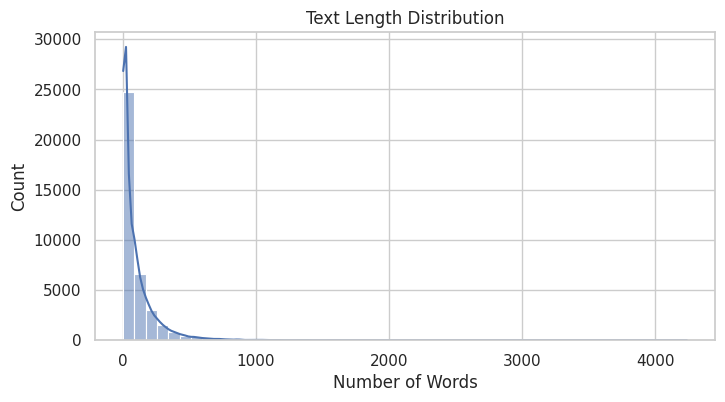

In [13]:
plt.figure(figsize=(8,4))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.show()


In [15]:
for label in df['status'].unique():
    print(f"\n--- {label} ---")
    print(df[df['status'] == label]['statement'].iloc[0])



--- Anxiety ---
oh my gosh

--- Normal ---
Gr gr dreaming of ex crush to be my game, God

--- Depression ---
I recently went through a breakup and she said she still wants to be friends so I said I can try doing that but when she talks to me about things it always hurts. I just want to lose feelings so all this pain can stop it hurts so much and I cannot even cry about it. I do not want to hurt her because she said she does not want to never speak to me again but I do not know what to do here. When we were together she always hurt me so I do not know why I still love her. I wish we never met it would be much less painful How do I lose feelings?

--- Stress ---
He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the roa